In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.randn(1000, 10)
y = (X[:, 0] + X[:, 1] > 0).astype(int)
y = tf.keras.utils.to_categorical(y, 2)

def build_model(optimizer, activation, initializer):
    model = models.Sequential()
    model.add(layers.Dense(64, input_shape=(10,), activation=activation, kernel_initializer=initializer))
    model.add(layers.Dense(32, activation=activation, kernel_initializer=initializer))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
activations = ['sigmoid', 'tanh', 'relu']
optimizer = ['sgd', 'adam']
initializers = {
    'sigmoid': tf.keras.initializers.GlorotUniform(),
    'tanh': tf.keras.initializers.GlorotUniform(),
    'relu': tf.keras.initializers.HeUniform()
}

weight_distributions = {}
for opt in optimizer:
    for act in activations:
        model = build_model(opt, act, initializers[act])
        weights_over_time = []
        
        weights_over_time.append(model.layers[0].get_weights()[0].flatten())
        
        model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        
        weights_over_time.append(model.layers[0].get_weights()[0].flatten())
        
        weight_distributions[f'{act}_{opt}'] = weights_over_time

C:\Users\deepp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


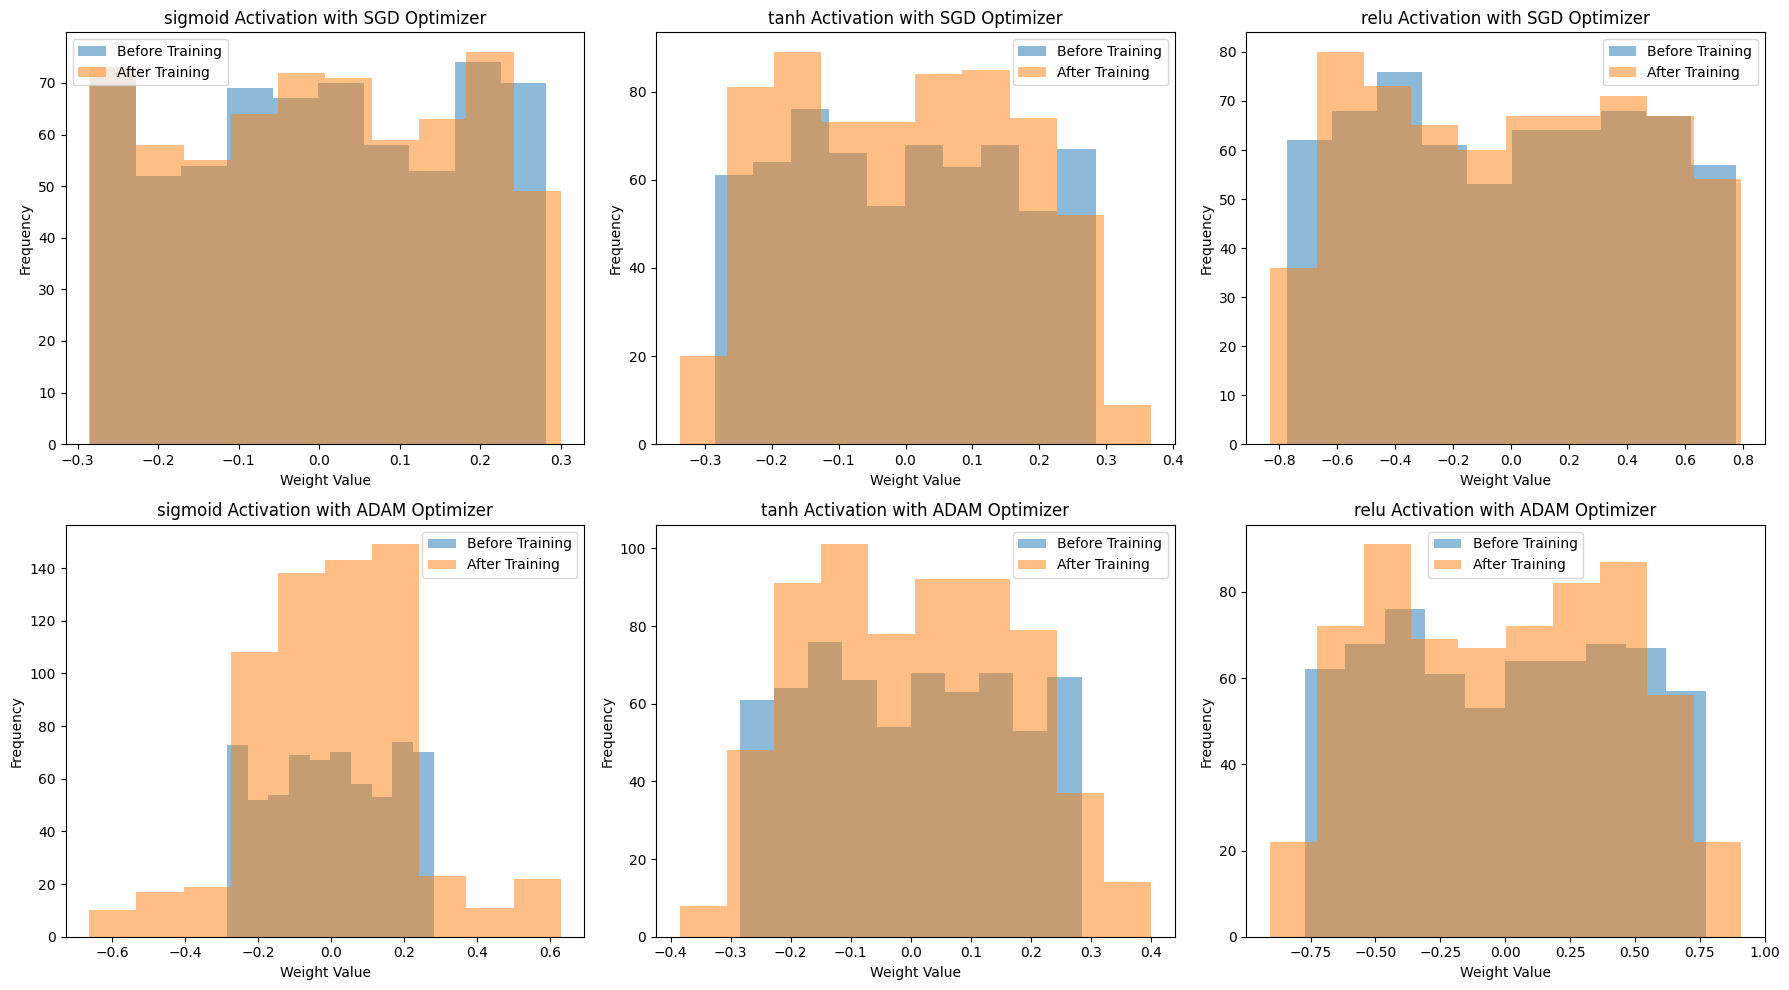

In [14]:
plt.figure(figsize=(18, 10))
plot_index = 1
for opt in optimizer:
    for act in activations:
        plt.subplot(2, 3, plot_index)
        plt.hist(weight_distributions[f'{act}_{opt}'][0], alpha=0.5, label="Before Training")
        plt.hist(weight_distributions[f'{act}_{opt}'][1], alpha=0.5, label="After Training")
        plt.title(f"{act} Activation with {opt.upper()} Optimizer")
        plt.xlabel("Weight Value")
        plt.ylabel("Frequency")
        plt.legend()
        plot_index += 1
plt.tight_layout()
plt.show()